## <span style="color:blue;"> Do comment and UpVote if you like the efforts. Thank You !! </span>

## <span style="color:orange;"> Q. What Do campus recruiters want ??? </span>

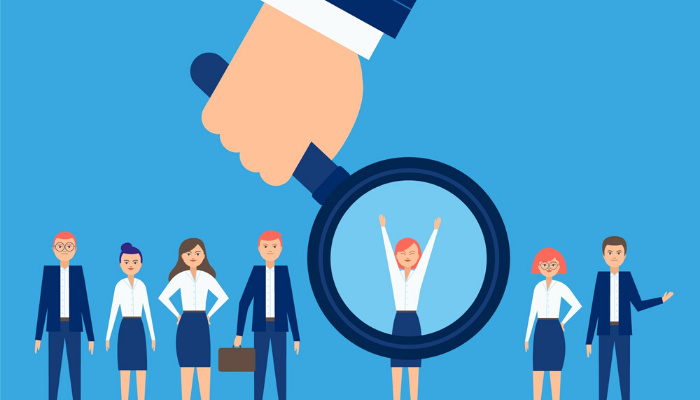

## In this notebook I will try to find what they may like but no one can actually vouch for anything. Leaving everything aside let's start... 

In [84]:
pip install python-highcharts

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [85]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# importing libraries

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import networkx as nx
import warnings
warnings.filterwarnings('ignore')
import folium 
from folium import plugins
from highcharts import Highchart

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv


In [86]:
data = pd.read_csv("/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv")

data.drop("sl_no", axis=1, inplace=True) # Removing Serial Number

## Let's review what data has been given .. 

In [87]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [88]:
## Let's also see if we have any null values .. 

display(data.info(),data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


None

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

### We don't have any missing values except 67 missing salary elements. <br> Its simple we can assume the these are those people who did not get placed in any company when the survey was being conducted. 

## EDA

## 1. Gender and Selection 

### In todays generation 'Gender' is just a formality in many jobs however sometimes it is also plays an important role in selection process as per the requirements. So let's see if there was any Gender bias or requirement in the given selection process.

In [89]:
gender_placed = data[data['gender'] == 'M'].status.value_counts().to_frame()
gender_not_placed = data[data['gender'] == 'F'].status.value_counts().to_frame()
gender_placed=gender_placed.merge(gender_not_placed,left_index=True,right_index=True,how='left').dropna()
gender_placed.columns=['Male', 'Female',]

H = Highchart(width=600,height=400)

options = {
    'title': {
        'text': 'Male vs Female Placements records(Placed or Not)'
    },
    'xAxis': {
        'categories': ['Placed', 'Not Placed',],
        'title': {
            'text':None
        }
    },
    'yAxis':{
        'min': 0,
        'title':{
            'text': 'Respondents'
        },
        'labels': {
            'overflow': 'justify'
        }
    },
    'legend': {
        'layout': 'vertical',
        'align': 'right',
        'verticalAlign': 'top',
        'x': -40,
        'y': 80,
        'floating': True,
        'borderWidth': 1,
        'shadow': True
    },
    'credits': {
        'enabled': False
    },
    'plotOptions': {
        'bar': {
            'dataLabels': {
                'enabled': True
            }
        }
    }
}

H.set_dict_options(options)

data1 = list(gender_placed['Male'])
data2 = list(gender_placed['Female'])
H.add_data_set(data1,'bar','Male')
H.add_data_set(data2,'bar','Female')
H

### So we can clearly see that more no. of males were placed than females. Moreover ratio of male:female placed vs not placed is also high for females as less no. of them have been selected. 
### There can be many reasons for this lets find them..

## 2. Board Marks and Placements ...

### Let's see if 10th and 12th board marks really matter.

## ssc_b (Board of Education - Secondary)

In [90]:
placed = data[data['status'] == 'Placed'].ssc_b.value_counts().to_frame()
not_placed = data[data['status'] == 'Not Placed'].ssc_b.value_counts().to_frame()
placed=placed.merge(not_placed,left_index=True,right_index=True,how='left').dropna()
placed.columns=['placed','not placed']

H = Highchart(width=600,height=400)

options = {
    'title': {
        'text': 'ssc_b Placements records(Placed or Not)'
    },
    'xAxis': {
        'categories': list(placed.index),
        'title': {
            'text':None
        }
    },
    'yAxis':{
        'min': 0,
        'title':{
            'text': 'Count'
        },
        'labels': {
            'overflow': 'justify'
        }
    },
    'legend': {
        'layout': 'vertical',
        'align': 'right',
        'verticalAlign': 'top',
        'x': -40,
        'y': 80,
        'floating': True,
        'borderWidth': 1,
        'shadow': True
    },
    'credits': {
        'enabled': False
    },
    'plotOptions': {
        'bar': {
            'dataLabels': {
                'enabled': True
            }
        }
    }
}

H.set_dict_options(options)

data1 = list(placed['placed'])
data2 = list(placed['not placed'])
H.add_data_set(data1,'bar','placed')
H.add_data_set(data2,'bar','not placed')
H

### (I) There is count of central board students is very high as compared to all other boards.It might be because central board is easy.<br>(II) The count of placed students from central board is little more than others category which doesn't say much.

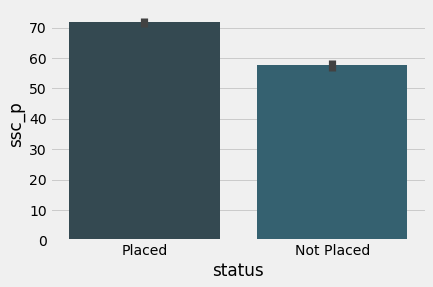

In [91]:

# Let's plot percentage vs status to see how much effect they make
sns.set_palette(sns.color_palette('PuBuGn_d'))
sns.barplot(x="status", y="ssc_p", data=data)


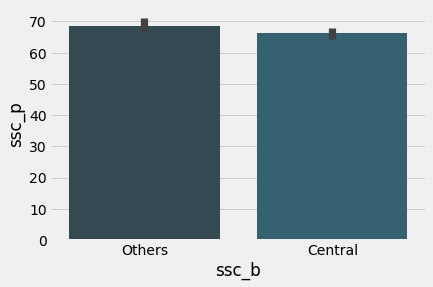

In [92]:

# Let's see the how much percentage was scored by students in different boards

sns.barplot(x="ssc_b", y="ssc_p", data=data)

#### (I) Percentage in secondary education has a clear impact on placements.Higher percentage candidates have a very good chance of getting placed.

#### (II) Looks like there is not impace of boards on percentages of students.

## hsc_b (Board of Education - Higher)

In [93]:
hsc_b_placed = data[data['status'] == 'Placed'].hsc_b.value_counts().to_frame()
hsc_b_not_placed = data[data['status'] == 'Not Placed'].hsc_b.value_counts().to_frame()
hsc_b_placed=hsc_b_placed.merge(hsc_b_not_placed,left_index=True,right_index=True,how='left').dropna()
hsc_b_placed.columns=['placed','not placed']

H = Highchart(width=600,height=400)

options = {
    'title': {
        'text': 'hsc_b Placements records(Placed or Not)'
    },
    'xAxis': {
        'categories': list(hsc_b_placed.index),
        'title': {
            'text':None
        }
    },
    'yAxis':{
        'min': 0,
        'title':{
            'text': 'Count'
        },
        'labels': {
            'overflow': 'justify'
        }
    },
    'legend': {
        'layout': 'vertical',
        'align': 'right',
        'verticalAlign': 'top',
        'x': -40,
        'y': 80,
        'floating': True,
        'borderWidth': 1,
        'shadow': True
    },
    'credits': {
        'enabled': False
    },
    'plotOptions': {
        'bar': {
            'dataLabels': {
                'enabled': True
            }
        }
    }
}

H.set_dict_options(options)

data1 = list(hsc_b_placed['placed'])
data2 = list(hsc_b_placed['not placed'])
H.add_data_set(data1,'bar','placed')
H.add_data_set(data2,'bar','not placed')
H

#### (I) Looks like more number of candidates opted for others for 12th grade as compared to 10th grade.<br>(II) This time also not much difference between in the fraction of placed candidates in respective boards. Thus, board doesn't matter in placements.

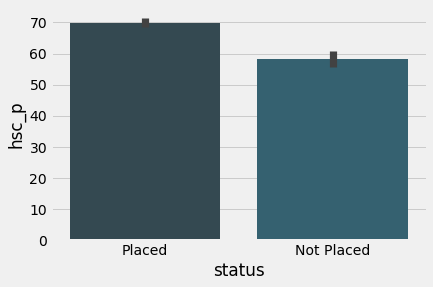

In [94]:
# Let's plot percentage vs status to see how much effect they make

sns.barplot(x="status", y="hsc_p", data=data)

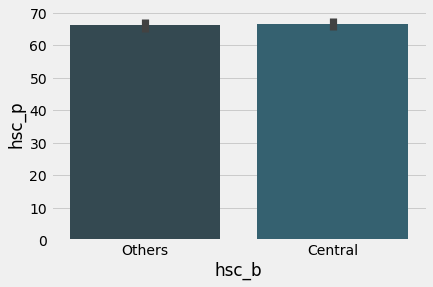

In [95]:
# Let's see the how much percentage was scored by students in 12th grade in different boards

sns.barplot(x="hsc_b", y="hsc_p", data=data)

#### (I) Percentage in higher secondary education also has a clear impact on placements. Higher percentage candidates have a very good chance of getting placed.

#### (II) Board isn't a determinant in defining how much precentage students score.

#### Thus, it turns out that a piece of paper can definately decide your future atleast for placements, so study hard!

## hsc_s (Specialization in Higher Secondary Education)

In [96]:
hsc_splaced = data[data['status'] == 'Placed'].hsc_s.value_counts().to_frame()
hsc_snot_placed = data[data['status'] == 'Not Placed'].hsc_s.value_counts().to_frame()
hsc_splaced=hsc_splaced.merge(hsc_snot_placed,left_index=True,right_index=True,how='left').dropna()
hsc_splaced.columns=['placed','not placed']

H = Highchart(width=600,height=400)

options = {
    'title': {
        'text': 'hsc_s Placements records(Placed or Not)'
    },
    'xAxis': {
        'categories': list(hsc_splaced.index),
        'title': {
            'text':None
        }
    },
    'yAxis':{
        'min': 0,
        'title':{
            'text': 'Count'
        },
        'labels': {
            'overflow': 'justify'
        }
    },
    'legend': {
        'layout': 'vertical',
        'align': 'right',
        'verticalAlign': 'top',
        'x': -40,
        'y': 80,
        'floating': True,
        'borderWidth': 1,
        'shadow': True
    },
    'credits': {
        'enabled': False
    },
    'plotOptions': {
        'bar': {
            'dataLabels': {
                'enabled': True
            }
        }
    }
}

H.set_dict_options(options)

data1 = list(hsc_splaced['placed'])
data2 = list(hsc_splaced['not placed'])
H.add_data_set(data1,'bar','placed')
H.add_data_set(data2,'bar','not placed')
H

#### (I) The most popular branch turns out to be commerce or maybe as most of students get average marks so they were admitted to got commerce on based of their marks. Science is the second most popular and the least popular is arts.

#### (II) Looking at the fraction of placed and not placed we can say that science branch students have more chance of getting placed than commerce students and most around 45% of the students in arts are not placed

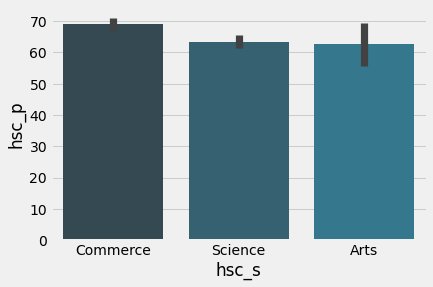

In [97]:
# Let's look at how well each specialisation students performed

ax = sns.barplot(x="hsc_s", y="hsc_p", data=data)

#### Almost every branch students performed equally but commerce students have slightly better score than other two.

## degree_t & degree_p (Degree Type and Degree percentage)

In [98]:
degree_tplaced = data[data['status'] == 'Placed'].degree_t.value_counts().to_frame()
degree_tnot_placed = data[data['status'] == 'Not Placed'].degree_t.value_counts().to_frame()
degree_tplaced=degree_tplaced.merge(degree_tnot_placed,left_index=True,right_index=True,how='left').dropna()
degree_tplaced.columns=['placed','not placed']

H = Highchart(width=600,height=400)

options = {
    'title': {
        'text': 'degree_t Placements records(Placed or Not)'
    },
    'xAxis': {
        'categories': list(degree_tplaced.index),
        'title': {
            'text':None
        }
    },
    'yAxis':{
        'min': 0,
        'title':{
            'text': 'Count'
        },
        'labels': {
            'overflow': 'justify'
        }
    },
    'legend': {
        'layout': 'vertical',
        'align': 'right',
        'verticalAlign': 'top',
        'x': -40,
        'y': 80,
        'floating': True,
        'borderWidth': 1,
        'shadow': True
    },
    'credits': {
        'enabled': False
    },
    'plotOptions': {
        'bar': {
            'dataLabels': {
                'enabled': True
            }
        }
    }
}

H.set_dict_options(options)

data1 = list(degree_tplaced['placed'])
data2 = list(degree_tplaced['not placed'])
H.add_data_set(data1,'bar','placed')
H.add_data_set(data2,'bar','not placed')
H

(I) The students opted for following fields:<br>
1.Science and Technology (must be science students)<br>
2.Commerce and management (might be a mixture of commerce and Arts)<br>
3.Others<br>

(II) Looks like Commerce and Science degree students are preffered by companies which is obvious. Students who opted for Others have very low placement chance.

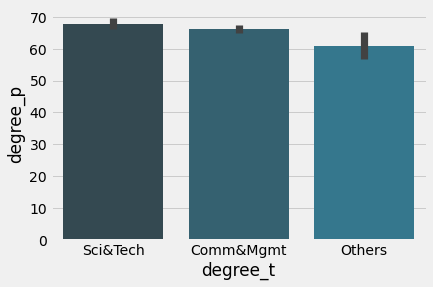

In [99]:
# Let's look at how well each field students performed

sns.barplot(x="degree_t", y="degree_p", data=data)

There is not much difference in performace of students from Science and Commerce but there but students who opted for "Others" have low performance


## Work experience Vs Placement Status

In [100]:
work = data['workex'].value_counts().to_frame()
work = pd.DataFrame({'Work_experience':work.index,'Count':work['workex']})
work.reset_index(drop=True, inplace=True)

In [101]:
H = Highchart(width=450, height=400)
options = {
    'title': {
        'text':'Work experience'
    },
    'chart': {
        'style': {
            'fontFamily': '\'Unica One\', sans-serif'
        },
        'type': 'pie',
        'options3d': {
            'enabled': True,
            'alpha': 45
        }
    },
    'plotOptions': {
        'pie': {
            'innerSize': 100,
            'depth': 45
        }
    },
}

data1 = work.values.tolist()

H.set_dict_options(options)
H.add_data_set(data1, 'pie', 'Count')

H

In [102]:
placed = data[data['status'] == 'Placed'].workex.value_counts().to_frame()
not_placed = data[data['status'] == 'Not Placed'].workex.value_counts().to_frame()
placed=placed.merge(not_placed,left_index=True,right_index=True,how='left').dropna()
placed.columns=['placed','not placed']

H = Highchart(width=600,height=400)

options = {
    'title': {
        'text': 'People with work experience Yes of No(Placed or Not)'
    },
    'xAxis': {
        'categories': list(placed.index),
        'title': {
            'text':None
        }
    },
    'yAxis':{
        'min': 0,
        'title':{
            'text': 'Count'
        },
        'labels': {
            'overflow': 'justify'
        }
    },
    'legend': {
        'layout': 'vertical',
        'align': 'right',
        'verticalAlign': 'top',
        'x': -40,
        'y': 80,
        'floating': True,
        'borderWidth': 1,
        'shadow': True
    },
    'credits': {
        'enabled': False
    },
    'plotOptions': {
        'bar': {
            'dataLabels': {
                'enabled': True
            }
        }
    }
}

H.set_dict_options(options)

data1 = list(placed['placed'])
data2 = list(placed['not placed'])
H.add_data_set(data1,'bar','placed')
H.add_data_set(data2,'bar','not placed')
H

#### Companies prefer candidates with work experience so the students with internships and past job experience have better chances of being placed.

#### The plot may look that many people without the work experience got the job but the ration shows that people prior experience had better chance in getting selected. 

## Specialisation Courses and Placements

In [103]:
placed = data[data['status'] == 'Placed'].specialisation.value_counts().to_frame()
not_placed = data[data['status'] == 'Not Placed'].specialisation.value_counts().to_frame()
placed=placed.merge(not_placed,left_index=True,right_index=True,how='left').dropna()
placed.columns=['placed','not placed']

H = Highchart(width=600,height=400)

options = {
    'title': {
        'text': 'People with specialisation(Placed or Not)'
    },
    'xAxis': {
        'categories': list(placed.index),
        'title': {
            'text':None
        }
    },
    'yAxis':{
        'min': 0,
        'title':{
            'text': 'Count'
        },
        'labels': {
            'overflow': 'justify'
        }
    },
    'legend': {
        'layout': 'vertical',
        'align': 'right',
        'verticalAlign': 'top',
        'x': -40,
        'y': 80,
        'floating': True,
        'borderWidth': 1,
        'shadow': True
    },
    'credits': {
        'enabled': False
    },
    'plotOptions': {
        'bar': {
            'dataLabels': {
                'enabled': True
            }
        }
    }
}

H.set_dict_options(options)

data1 = list(placed['placed'])
data2 = list(placed['not placed'])
H.add_data_set(data1,'bar','placed')
H.add_data_set(data2,'bar','not placed')
H

#### Specialisation is a clear indicator in placements. Compared to MktandFin, Mkt&HR students have low placements. This might be because there is low requirements for HR in a company.

## I am not going into the Salary aspect as this notebook is only to predict whether you will be placed or not..

## Step 2. Classification/ Prediction

## a)Preprocessing data for classficiation models

### Label Encoding

In [104]:
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
object_cols=['gender','workex','specialisation','status']

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])
#data.head()

In [105]:
# Using get dummies for 3 class categorical variables (hsc_s and degree_t)

for column in ['hsc_s', 'degree_t']:
    dummies = pd.get_dummies(data[column])
    data[dummies.columns] = dummies

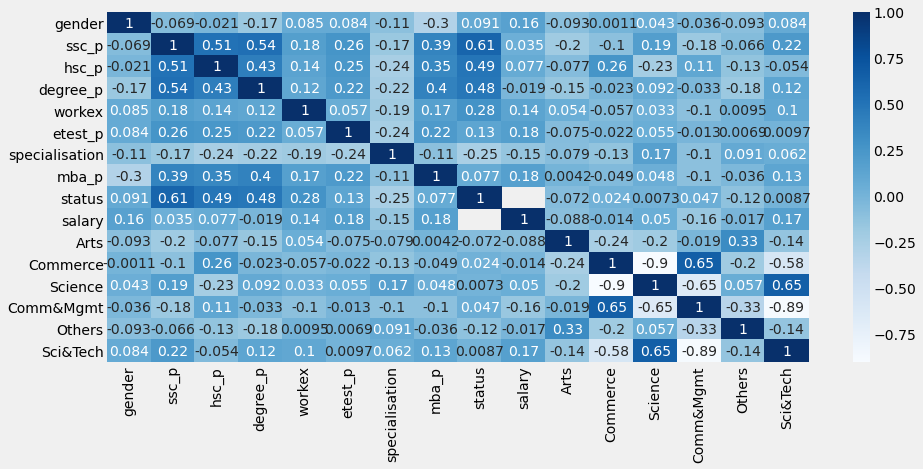

In [106]:
# Let's plot correlation matrix to find out less correlated variable to drop them

cor=data.corr()
plt.figure(figsize=(14,6))
sns.heatmap(cor,annot=True,cmap=plt.cm.Blues)

In [107]:
## Now Lets drop few columns with negative correlations 


data.drop(['Others', 'Arts','degree_t','hsc_s','ssc_b','hsc_b', 'salary'], axis=1, inplace=True)

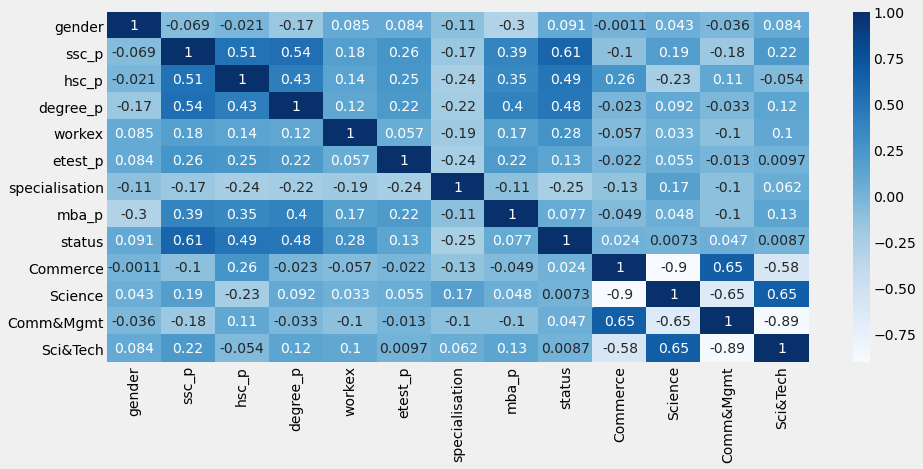

In [108]:
## Final Correlation  plot 
# Let's plot correlation matrix to find out less correlated variable to drop them

cor=data.corr()
plt.figure(figsize=(14,6))
sns.heatmap(cor,annot=True,cmap=plt.cm.Blues)

## Creating Training and Test data

In [109]:
# target vector
y = data['status']

# dropping as it is not a predictor
data.drop('status', axis = 1, inplace = True)

# scaling the data so as to get rid of any dramatic results during modelling
sc = StandardScaler()

# predictors
X = sc.fit_transform(data)

# Let us now split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


print("X-Train:",X_train.shape)
print("X-Test:",X_test.shape)
print("Y-Train:",y_train.shape)
print("Y-Test:",y_test.shape)

X-Train: (172, 12)
X-Test: (43, 12)
Y-Train: (172,)
Y-Test: (43,)


## Logistic Regression

### I am going to use it as it is a great classifier and works well with binary data. 

In [110]:
#creating our model instance
log_reg = LogisticRegression()

#fitting the model
log_reg.fit(X_train, y_train)

LogisticRegression()

In [111]:
# predicting the target vectors

y_pred=log_reg.predict(X_test)

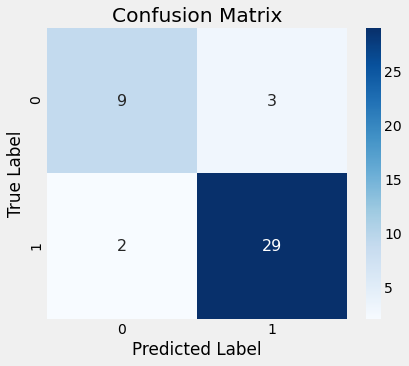

In [112]:
# creating confusion matrix heatmap

conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred))
fig = plt.figure(figsize=(6,5))
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}, fmt='g',cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Currently the model is working fine but the incorrect predictions need to be less as good candidates should not be rejected, for once we can deal with unfit candidates being selected.

In [113]:
# getting precision, recall and f1-score via classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43



In [114]:
# let's look at our accuracy

accuracy = accuracy_score(y_pred, y_test)

print(f"The accuracy on test set using Logistic Regression is: {np.round(accuracy, 3)*100.0}%")

The accuracy on test set using Logistic Regression is: 88.4%


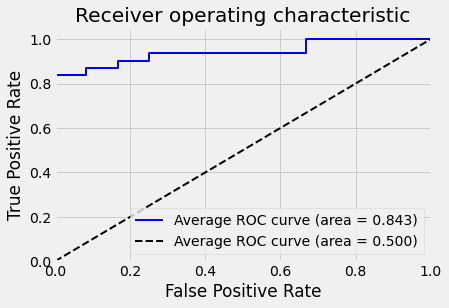

In [115]:
# plotting the ROC curve

auc_roc = roc_auc_score(y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, color='blue', lw=2, 
         label='Average ROC curve (area = {0:0.3f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', 
         label= 'Average ROC curve (area = 0.500)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [116]:
# calculate auc 
auc_score = auc(fpr, tpr)
print(f"Our auc_score came out to be {round(auc_score, 3)}.")

Our auc_score came out to be 0.941.


## I got a test_score of 88.4%  and an 94.1% AUC score which is great. But I will try to increase it in the next versions..

## Conclusion:

1. More male candidates got placed as compared to female candidates.
2. Male Candidates got higher CTCs as compared to female candidates.
3. Type of Board choosen does not have any effect on placements thus we can drop in preprocessing steps.
4. Most of the students preferred Central board in 10th grade whereas other boards in 12th grade.
5. Candidates with higher percentages have better chance of placements.
6. Choosing Science and Commerce as Specialisation seems to have perk when it comes to placments.
7. Commerce is the most popular branch among candidates.
8. Choosing Sci&Tech and Comm&Mngmt as degree will fetch you higher CTCs.

## I hope you had a great Experience going through the notebook . Do comment and Upvote if you like . Thank You 🙏🙏